## Import libraries

In [194]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

## Get the data

In [195]:
df = pd.read_csv("../../../datasets/parte2/teste/dataset.csv")
dfWeatherData = pd.read_csv("../../../datasets/parte2/teste/missingWeatherData.csv")

## Feature engineering

#### Split date

In [196]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d", utc=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(['date'], inplace=True, axis=1)


df.head()

,dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,...,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,year,month,day
0,1672531200,local,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,...,3.72,100,moderate rain,0,0.0,0.467,0.0,2023,1,1
1,1672534800,local,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,...,3.26,100,moderate rain,1,0.0,0.577,0.0,2023,1,1
2,1672538400,local,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,...,2.44,100,moderate rain,2,0.0,0.346,0.0,2023,1,1
3,1672542000,local,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,...,1.74,100,moderate rain,3,0.0,0.270,0.0,2023,1,1
4,1672545600,local,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,...,1.13,100,moderate rain,4,0.0,0.252,0.0,2023,1,1


#### Remove city_name

In [197]:
df.drop('city_name', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,year,month,day
0,1672531200,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,100,moderate rain,0,0.0,0.467,0.0,2023,1,1
1,1672534800,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,100,moderate rain,1,0.0,0.577,0.0,2023,1,1
2,1672538400,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,100,moderate rain,2,0.0,0.346,0.0,2023,1,1
3,1672542000,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,100,moderate rain,3,0.0,0.270,0.0,2023,1,1
4,1672545600,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,100,moderate rain,4,0.0,0.252,0.0,2023,1,1


#### Remove day, month, year and hour

In [198]:
df['Data'] = pd.to_datetime(df[['year', 'month', 'day']])
df.drop('day', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,month,Data
0,1672531200,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,100,moderate rain,0,0.0,0.467,0.0,1,2023-01-01
1,1672534800,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,100,moderate rain,1,0.0,0.577,0.0,1,2023-01-01
2,1672538400,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,100,moderate rain,2,0.0,0.346,0.0,1,2023-01-01
3,1672542000,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,100,moderate rain,3,0.0,0.270,0.0,1,2023-01-01
4,1672545600,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,100,moderate rain,4,0.0,0.252,0.0,1,2023-01-01


#### Remove dt

In [199]:
df.drop('dt', axis=1, inplace=True)

df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,month,Data
0,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,100,moderate rain,0,0.0,0.467,0.0,1,2023-01-01
1,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,100,moderate rain,1,0.0,0.577,0.0,1,2023-01-01
2,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,100,moderate rain,2,0.0,0.346,0.0,1,2023-01-01
3,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,100,moderate rain,3,0.0,0.270,0.0,1,2023-01-01
4,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,100,moderate rain,4,0.0,0.252,0.0,1,2023-01-01


## Label enconding

In [200]:
df['weather_description'] = df['weather_description'].replace('clear sky', 'sky is clear')

In [201]:
lb = LabelBinarizer()

lb_results = lb.fit_transform(df['weather_description'])

lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

df = pd.concat([df, lb_results_df], axis=1)

df.drop('weather_description', axis=1, inplace=True)

df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,...,month,Data,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear
0,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,...,1,2023-01-01,0,0,0,0,1,0,0,0
1,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,...,1,2023-01-01,0,0,0,0,1,0,0,0
2,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,...,1,2023-01-01,0,0,0,0,1,0,0,0
3,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,...,1,2023-01-01,0,0,0,0,1,0,0,0
4,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,...,1,2023-01-01,0,0,0,0,1,0,0,0


## Missing Values

In [202]:
print(df.isna().sum())
df.shape

temp                       0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
sea_level               2256
grnd_level              2256
humidity                   0
wind_speed                 0
rain_1h                 2050
clouds_all                 0
hour                       0
normal                     0
economic_schedule          0
self-consumption           0
month                      0
Data                       0
broken clouds              0
few clouds                 0
heavy intensity rain       0
light rain                 0
moderate rain              0
overcast clouds            0
scattered clouds           0
sky is clear               0
dtype: int64


(2256, 25)

In [203]:
dfWeatherData.dtypes

temp          float64
humidity      float64
pressure      float64
clouds_all    float64
wind_speed    float64
Data           object
Hora            int64
temp_max      float64
temp_min      float64
dtype: object

In [204]:
dfWeatherData.head()

,temp,humidity,pressure,clouds_all,wind_speed,Data,Hora,temp_max,temp_min
0,7.5795,92.105790,1023.2,0.3,4.693825,2023-03-15,0,19.4795,3.1295
1,6.6295,93.656876,1022.7,2.1,5.860375,2023-03-15,1,19.4795,3.1295
2,5.7795,94.269510,1022.5,2.1,6.638072,2023-03-15,2,19.4795,3.1295
3,5.1295,94.240280,1022.0,5.4,5.411986,2023-03-15,3,19.4795,3.1295
4,4.4795,94.876150,1020.8,0.3,4.024922,2023-03-15,4,19.4795,3.1295


In [205]:
dfWeatherData['Data'] = pd.to_datetime(dfWeatherData['Data'])
dfWeatherData['Hora'] = pd.to_timedelta(dfWeatherData['Hora'], unit='h')
dfWeatherData['DataHora'] = pd.to_datetime(dfWeatherData['Data']) + dfWeatherData['Hora']
dfWeatherData.drop('Hora', axis=1, inplace=True)
dfWeatherData.drop('Data', axis=1, inplace=True)

In [206]:
dfWeatherData.tail()

,temp,humidity,pressure,clouds_all,wind_speed,temp_max,temp_min,DataHora
499,20.079500,34.974290,1015.1,0.0,4.334974,21.9795,5.6295,2023-04-04 19:00:00
500,13.579500,63.051014,1016.1,0.0,8.891344,21.9795,5.6295,2023-04-04 20:00:00
501,12.579500,66.615400,1017.0,2.4,7.993297,21.9795,5.6295,2023-04-04 21:00:00
502,11.679501,67.814880,1017.5,0.9,8.669949,21.9795,5.6295,2023-04-04 22:00:00
503,9.629500,77.460400,1017.9,0.0,8.049845,21.9795,5.6295,2023-04-04 23:00:00


In [207]:
dfWeatherData.dtypes

temp                 float64
humidity             float64
pressure             float64
clouds_all           float64
wind_speed           float64
temp_max             float64
temp_min             float64
DataHora      datetime64[ns]
dtype: object

In [208]:
df['Data'] = pd.to_datetime(df['Data'])
df['Hora'] = pd.to_timedelta(df['hour'], unit='h')
df['DataHora'] = pd.to_datetime(df['Data']) + df['Hora']
df.drop('Hora', axis=1, inplace=True)
df.drop('Data', axis=1, inplace=True)

In [209]:
df.tail()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,...,month,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear,DataHora
2251,290.89,290.00,290.89,290.89,1011,NaN,NaN,49,1.35,NaN,...,4,0,0,0,0,0,1,0,0,2023-04-04 19:00:00
2252,288.84,287.93,288.84,288.84,1012,NaN,NaN,56,1.07,NaN,...,4,0,0,0,0,0,1,0,0,2023-04-04 20:00:00
2253,287.55,286.64,287.55,287.55,1012,NaN,NaN,61,1.23,NaN,...,4,0,0,0,0,0,1,0,0,2023-04-04 21:00:00
2254,286.70,285.76,286.70,286.70,1013,NaN,NaN,63,1.09,NaN,...,4,1,0,0,0,0,0,0,0,2023-04-04 22:00:00
2255,286.00,285.09,286.00,286.00,1014,NaN,NaN,67,1.86,NaN,...,4,1,0,0,0,0,0,0,0,2023-04-04 23:00:00


In [210]:
df.dtypes

temp                           float64
feels_like                     float64
temp_min                       float64
temp_max                       float64
pressure                         int64
sea_level                      float64
grnd_level                     float64
humidity                         int64
wind_speed                     float64
rain_1h                        float64
clouds_all                       int64
hour                             int64
normal                         float64
economic_schedule              float64
self-consumption               float64
month                            int32
broken clouds                    int64
few clouds                       int64
heavy intensity rain             int64
light rain                       int64
moderate rain                    int64
overcast clouds                  int64
scattered clouds                 int64
sky is clear                     int64
DataHora                datetime64[ns]
dtype: object

#### Remove sea_level, grnd_level and rain_1h

In [211]:
df.drop('sea_level', axis=1, inplace=True)
df.drop('grnd_level', axis=1, inplace=True)
df.drop('rain_1h', axis=1, inplace=True)
"""
df['temp'].fillna(df['temp'].mean(), inplace=True)

df['temp_min'].fillna(df['temp_min'].mean(), inplace=True)

df['temp_max'].fillna(df['temp_max'].mean(), inplace=True)

df['pressure'].fillna(df['pressure'].mean(), inplace=True)

df['humidity'].fillna(df['humidity'].mean(), inplace=True)

df['wind_speed'].fillna(df['wind_speed'].mean(), inplace=True)

df['clouds_all'].fillna(df['clouds_all'].mean(), inplace=True)
"""
df.set_index('DataHora', inplace=True)
dfWeatherData.set_index('DataHora', inplace=True)

df.update(dfWeatherData)

df.reset_index(inplace=True)

df.drop('DataHora', axis=1, inplace=True)

print(df.isna().sum())
df.shape

temp                    0
feels_like              0
temp_min                0
temp_max                0
pressure                0
humidity                0
wind_speed              0
clouds_all              0
hour                    0
normal                  0
economic_schedule       0
self-consumption        0
month                   0
broken clouds           0
few clouds              0
heavy intensity rain    0
light rain              0
moderate rain           0
overcast clouds         0
scattered clouds        0
sky is clear            0
dtype: int64


(2256, 21)

#### Types Visualization

In [212]:
df.dtypes

temp                    float64
feels_like              float64
temp_min                float64
temp_max                float64
pressure                float64
humidity                float64
wind_speed              float64
clouds_all              float64
hour                      int64
normal                  float64
economic_schedule       float64
self-consumption        float64
month                     int32
broken clouds             int64
few clouds                int64
heavy intensity rain      int64
light rain                int64
moderate rain             int64
overcast clouds           int64
scattered clouds          int64
sky is clear              int64
dtype: object

#### Data normalization

In [213]:
df['temp'] = (df['temp'] - df['temp'].min()) / (df['temp'].max() - df['temp'].min())

df['feels_like'] = (df['feels_like'] - df['feels_like'].min()) / (df['feels_like'].max() - df['feels_like'].min())

df['temp_min'] = (df['temp_min'] - df['temp_min'].min()) / (df['temp_min'].max() - df['temp_min'].min())

df['temp_max'] = (df['temp_max'] - df['temp_max'].min()) / (df['temp_max'].max() - df['temp_max'].min())

df['pressure'] = (df['pressure'] - df['pressure'].min()) / (df['pressure'].max() - df['pressure'].min())

df['humidity'] = (df['humidity'] - df['humidity'].min()) / (df['humidity'].max() - df['humidity'].min())

df['wind_speed'] = (df['wind_speed'] - df['wind_speed'].min()) / (df['wind_speed'].max() - df['wind_speed'].min())

df['clouds_all'] = (df['clouds_all'] - df['clouds_all'].min()) / (df['clouds_all'].max() - df['clouds_all'].min())

df['hour'] = (df['hour'] - df['hour'].min()) / (df['hour'].max() - df['hour'].min())

df['normal'] = (df['normal'] - df['normal'].min()) / (df['normal'].max() - df['normal'].min())

df['economic_schedule'] = (df['economic_schedule'] - df['economic_schedule'].min()) / (df['economic_schedule'].max() - df['economic_schedule'].min())

df['self-consumption'] = (df['self-consumption'] - df['self-consumption'].min()) / (df['self-consumption'].max() - df['self-consumption'].min())

df['month'] = (df['month'] - df['month'].min()) / (df['month'].max() - df['month'].min())

df['broken clouds'] = (df['broken clouds'] - df['broken clouds'].min()) / (df['broken clouds'].max() - df['broken clouds'].min())

df['few clouds'] = (df['few clouds'] - df['few clouds'].min()) / (df['few clouds'].max() - df['few clouds'].min())

df['heavy intensity rain'] = (df['heavy intensity rain'] - df['heavy intensity rain'].min()) / (df['heavy intensity rain'].max() - df['heavy intensity rain'].min())

df['light rain'] = (df['light rain'] - df['light rain'].min()) / (df['light rain'].max() - df['light rain'].min())

df['moderate rain'] = (df['moderate rain'] - df['moderate rain'].min()) / (df['moderate rain'].max() - df['moderate rain'].min())

df['overcast clouds'] = (df['overcast clouds'] - df['overcast clouds'].min()) / (df['overcast clouds'].max() - df['overcast clouds'].min())

df['scattered clouds'] = (df['scattered clouds'] - df['scattered clouds'].min()) / (df['scattered clouds'].max() - df['scattered clouds'].min())

df['sky is clear'] = (df['sky is clear'] - df['sky is clear'].min()) / (df['sky is clear'].max() - df['sky is clear'].min())


## Write new csv

In [214]:
df.to_csv('../../../datasets/parte2/teste/dataset_prepared.csv', index=False)

<Axes: >

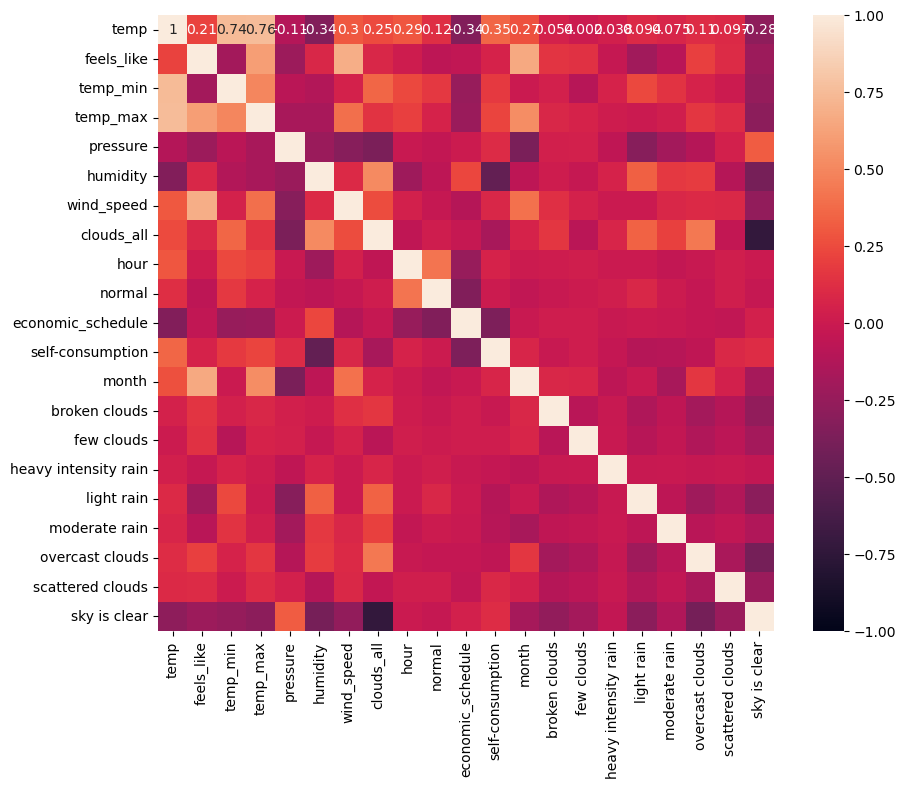

In [215]:
corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)